In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
import pickle

'''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.5f}'.format)
'''

c:\Users\lesmo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


"\npd.set_option('display.max_rows', 500)\npd.set_option('display.max_columns', 500)\npd.set_option('display.width', 1000)\npd.set_option('display.float_format', '{:,.5f}'.format)\n"

# Load Data

In [2]:
df = pickle.load(open("../data/merged_hotel_data.pkl", "rb"))
df=df.replace(r'^\s*$', np.nan, regex=True)
print(df.shape)
df.head()

(76536, 31)


,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,room_type_y,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,negative_review
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,NaN,1 night,January 2022,Couple,Philippines,10,January 2022,Ilike The place,I like The place and also the staff they're so...,NaN
1,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,Triple Room,2 nights,November 2022,Family,Philippines,7.0,November 2022,average,location,room is quite old already.
2,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,NaN,1 night,June 2022,Couple,Philippines,5.0,June 2022,okay,The location,There was cockroach and the shower valve does ...
3,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,Deluxe Room,6 nights,May 2022,Solo traveler,India,6.0,May 2022,Pleasant,Its Near my work area,Wifi in the room is poor :(
4,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,Triple Room,1 night,May 2022,Family,United Arab Emirates,7.0,May 2022,Good,The location,NaN


# Preprocessing

In [3]:
df["review_score"]=df["review_score"].apply(lambda x: float(x.strip()))
df["nights_stayed_"]=df["nights_stayed"].apply(lambda x: int(x.strip().split(" ")[0]))

month_map = {'January':1, 'February':2, 'March':3 , 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8 , 'September':9, 'October':10, 'November':11, 'December':12}

df['date_stayed']=df['month_stayed'].apply(lambda x: dt.datetime(int(x.strip().split(" ")[1]),month_map[x.strip().split(" ")[0]],1))
df['month_name'] = df['month_stayed'].apply(lambda x: x.strip().split(" ")[0])
df['month'] = df['month_name'].map(month_map)
df['year'] = df['month_stayed'].apply(lambda x: x.strip().split(" ")[1])


df['date_reviewed_']=df['date_reviewed'].apply(lambda x: dt.datetime(int(x.strip().split(" ")[1]),month_map[x.strip().split(" ")[0]],1))
df['month_name_reviewed'] = df['date_reviewed'].apply(lambda x: x.strip().split(" ")[0])
df['month_reviewed'] = df['month_name_reviewed'].map(month_map)
df['year_reviewed'] = df['date_reviewed'].apply(lambda x: x.strip().split(" ")[1])



# Functions

In [4]:
def plot_bar_sp(df,c,title,dmap="default",orient='x',clr='#6cc8ba',hue=False, \
                 time_series=False, month_data=False,week_data=False,pod_data=False, long_dates=False,ax=None,limited=False):
    #F25278
    ax = ax or plt.gca()
    
    #data_df=df
    data_df = df[[c]]
    
    
    if hue!=False:  
        data_df = df[[c]+[hue]]
        #print(data_df)
    
    
       
    
    if dmap=="default":
        data_df['Class'] = data_df[c]
    
    else:
        data_df['Class'] = data_df[c].map(dmap)
    #print(data_df)
    
    #Order
    if time_series==False:
        o=data_df['Class'].value_counts().index
        #print(o)
    
    #Time- Series ORder
    else:
        o=data_df['Class'].value_counts().index.sort_values(ascending=True)
        
        
        if month_data==True:
            o=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "Nov", "Dec"]
            if long_dates==True:
                o=["January","February","March","April","May","June","July","August","September","October", "November", "December"]  
        if week_data==True:
            o=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"] 
            if long_dates==True:
                o=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"] 
                
        if pod_data==True:
            o=["early morning","breakfast","lunch","afternoon","dinner"] 
                #Would change this to off Hours
        
    if limited!=False:
        o=o[:limited]
        #print(o)
   
    #data_df["Class"]=data_df["Class"].astype(str)
    #print(data_df)
    #hue
    if hue==False:  
        if orient=='x':
            return sns.countplot(x=data_df['Class'], order=o,ax=ax, color=clr)
            

        else:
            return sns.countplot(y=data_df['Class'],order=o ,ax=ax,color=clr)
        
    if hue!=False:  
        #data_df["Class"]=data_df["Class"].astype(str)
        #l=o[:10]
        data_df["Class"] = pd.Categorical(data_df['Class'], o)
        if orient=='x':
            return sns.histplot(data_df, x="Class", hue="good_review", stat="percent",ax=ax,multiple="layer", shrink=.4,common_norm=False)

        else:
            return sns.histplot(data_df, y="Class", hue="good_review", stat="percent",ax=ax,multiple="dodge", shrink=.2,common_norm=False)

    ax.set_title(title)

# Column Setup

In [5]:
df.columns

Index(['hotel_name_', 'stars', 'location', 'review_rating', 'description',
       'main_facilities', 'total_reviews', 'sub_ratings',
       'sub_ratings_categories', 'sub_ratings_dict', 'hotel_surroundings',
       'hotel_surroundings_distance', 'surroundings_dict', 'room_type_x',
       'price_list', 'cheapest_price', 'facilities_groups', 'all_facilities',
       'link', 'room_price_dict', 'name', 'room_type_y', 'nights_stayed',
       'month_stayed', 'occupant_type', 'from_country', 'review_score',
       'date_reviewed', 'short_review', 'positive_review', 'negative_review',
       'nights_stayed_', 'date_stayed', 'month_name', 'month', 'year',
       'date_reviewed_', 'month_name_reviewed', 'month_reviewed',
       'year_reviewed'],
      dtype='object')

In [6]:
#id_cols=['name',"type1","type2"]
traveller_cols=['name','occupant_type','from_country',"room_type_y",'nights_stayed_',
                #'month_stayed',"'date_reviewed',",
                'date_stayed','month','year','month_name',
                'date_reviewed_','month_reviewed','year_reviewed',
                'review_score']

In [7]:
df_tr=df[traveller_cols]
df_tr["good_review"]=np.where(df_tr["review_score"]>=7.5,1,0)
df_tr

,name,occupant_type,from_country,room_type_y,nights_stayed_,date_stayed,month,year,month_name,date_reviewed_,month_reviewed,year_reviewed,review_score,good_review
0,Aira,Couple,Philippines,NaN,1,2022-01-01,1,2022,January,2022-01-01,1,2022,10.0,1
1,Nicanor,Family,Philippines,Triple Room,2,2022-11-01,11,2022,November,2022-11-01,11,2022,7.0,0
2,Henry,Couple,Philippines,NaN,1,2022-06-01,6,2022,June,2022-06-01,6,2022,5.0,0
3,Vinu,Solo traveler,India,Deluxe Room,6,2022-05-01,5,2022,May,2022-05-01,5,2022,6.0,0
4,Salt,Family,United Arab Emirates,Triple Room,1,2022-05-01,5,2022,May,2022-05-01,5,2022,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76531,Kern,Solo traveler,Philippines,NaN,1,2022-03-01,3,2022,March,2022-03-01,3,2022,10.0,1
76532,Jun,Couple,Philippines,NaN,1,2022-03-01,3,2022,March,2022-03-01,3,2022,10.0,1
76533,Kanji,Solo traveler,Philippines,NaN,2,2019-12-01,12,2019,December,2019-12-01,12,2019,5.0,0
76534,Antonino,Family,United Kingdom,NaN,2,2019-12-01,12,2019,December,2019-12-01,12,2019,2.9,0


In [8]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76536 entries, 0 to 76535
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            76536 non-null  object        
 1   occupant_type   76536 non-null  object        
 2   from_country    76313 non-null  object        
 3   room_type_y     59145 non-null  object        
 4   nights_stayed_  76536 non-null  int64         
 5   date_stayed     76536 non-null  datetime64[ns]
 6   month           76536 non-null  int64         
 7   year            76536 non-null  object        
 8   month_name      76536 non-null  object        
 9   date_reviewed_  76536 non-null  datetime64[ns]
 10  month_reviewed  76536 non-null  int64         
 11  year_reviewed   76536 non-null  object        
 12  review_score    76536 non-null  float64       
 13  good_review     76536 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), 

In [9]:
df_tr.nunique()

name              21120
occupant_type         4
from_country        193
room_type_y         285
nights_stayed_       36
date_stayed          38
month                12
year                  4
month_name           12
date_reviewed_       38
month_reviewed       12
year_reviewed         4
review_score         36
good_review           2
dtype: int64

# EDA

## General Customer Overview

### Review Score

67.23502665412356

7.805375248249101

<AxesSubplot:ylabel='Frequency'>

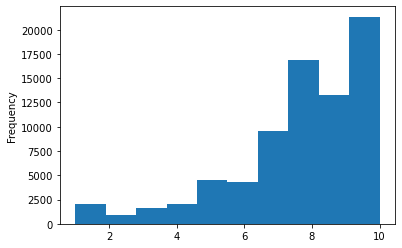

In [10]:
display(len(df_tr[df_tr.good_review==1])/len(df_tr)*100)
display(df_tr.review_score.mean())
df_tr.review_score.plot.hist()

Text(0.5, 1.0, 'Total Bad Reviews')

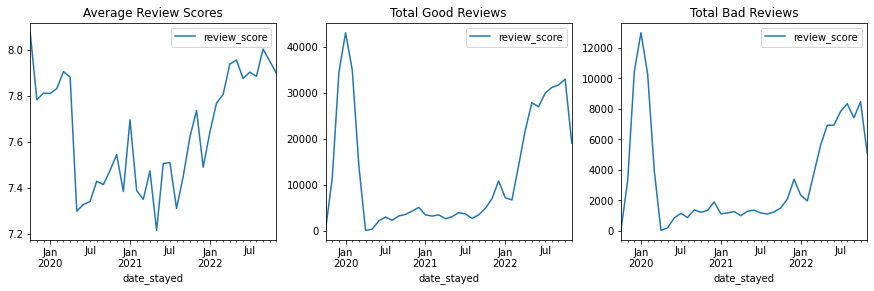

In [11]:
data1=df_tr.groupby("date_stayed")[["review_score"]].mean()
data2=df_tr[df_tr.good_review==1].groupby("date_stayed")[["review_score"]].sum()
data3=df_tr[df_tr.good_review==0].groupby("date_stayed")[["review_score"]].sum()

#line chart of monthly streams
fig= plt.figure(figsize=(15,4),)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#default is line so you can omit kind= parameter
data1.plot(ax=ax1, kind='line')
data2.plot(ax=ax2, kind='line')
data3.plot(ax=ax3, kind='line')

ax1.set_title('Average Review Scores')
ax2.set_title('Total Good Reviews')
ax3.set_title('Total Bad Reviews')


### Traveller Details

(0.0, 11.0)

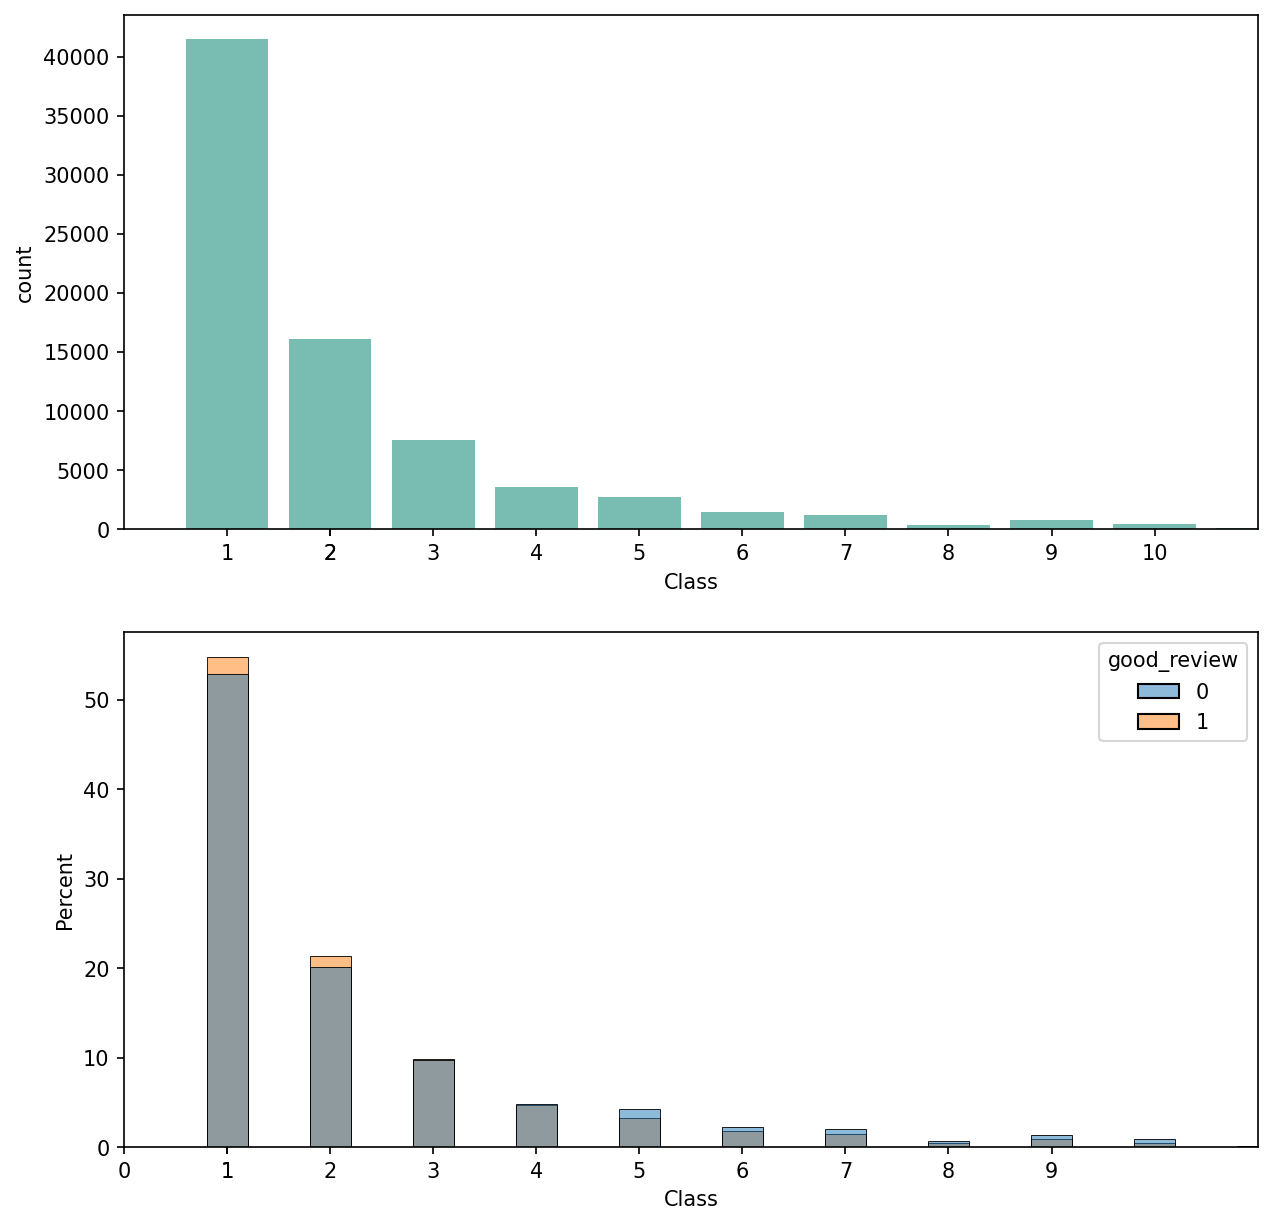

In [12]:



fig= plt.figure(figsize=(9.75,10),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True,  clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True,clr='#6cc8ba',ax=ax2)


ax1.set_xticks([1]+np.arange(0, 10).tolist())
ax2.set_xticks([1]+np.arange(0, 10).tolist())
ax1.set_xlim([-1, 10])
ax2.set_xlim([0, 11])

#ax2.sharex(ax1)

In [13]:
df_tr.nights_stayed_.value_counts(normalize=True)*100

1     54.198024
2     20.999268
3      9.826748
4      4.712815
5      3.600920
6      1.929811
7      1.635832
9      1.008676
10     0.610170
8      0.529163
14     0.151563
11     0.142417
12     0.128044
13     0.109752
15     0.092767
16     0.044424
30     0.039197
17     0.032664
18     0.024825
19     0.024825
21     0.022212
20     0.022212
29     0.020905
22     0.018292
28     0.014372
27     0.013066
26     0.011759
25     0.010453
23     0.006533
31     0.006533
24     0.003920
35     0.002613
32     0.001307
49     0.001307
45     0.001307
38     0.001307
Name: nights_stayed_, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='Percent'>

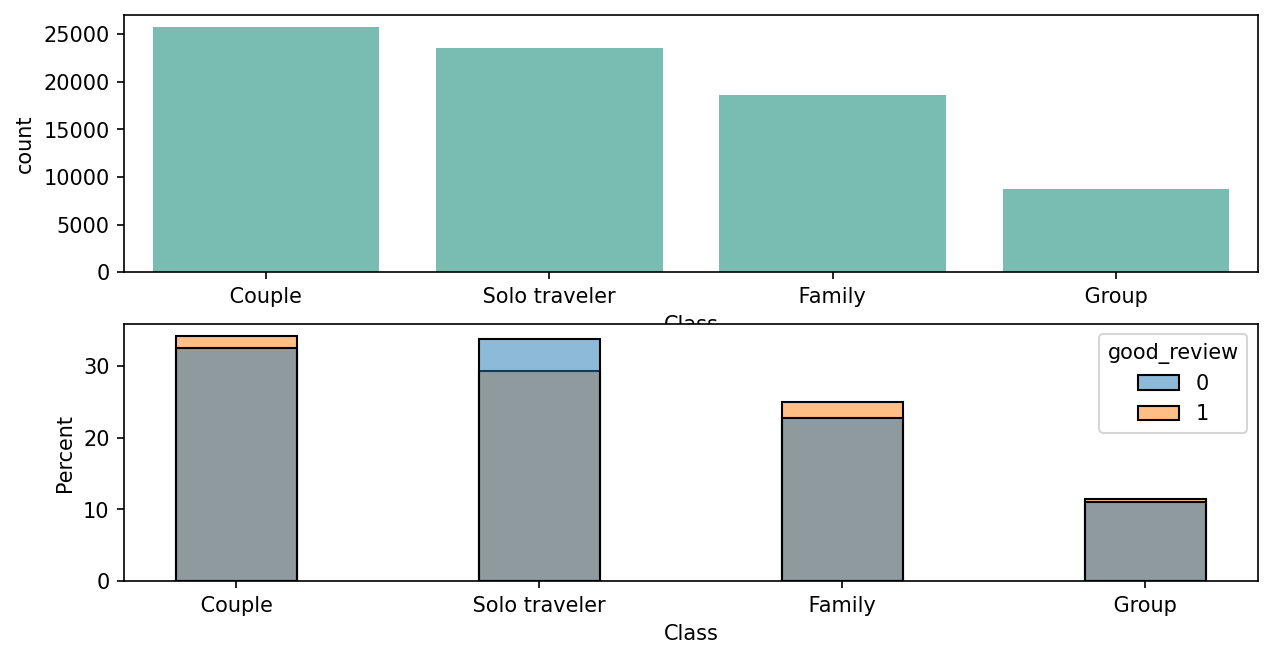

In [14]:



fig= plt.figure(figsize=(9.75,5),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

plot_bar_sp(df_tr,"occupant_type","title",orient="x",  clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"occupant_type","title",orient="x",hue="good_review",clr='#6cc8ba',ax=ax2)


# ax1.set_xticks([1]+np.arange(0, 10).tolist())
# ax2.set_xticks([1]+np.arange(0, 10).tolist())
# ax1.set_xlim([-1, 10])
# ax2.set_xlim([0, 11])

#ax2.sharex(ax1)

In [15]:
df_tr.occupant_type.value_counts(normalize=True)*100

 Couple            33.631232
 Solo traveler     30.729330
 Family            24.272238
 Group             11.367200
Name: occupant_type, dtype: float64

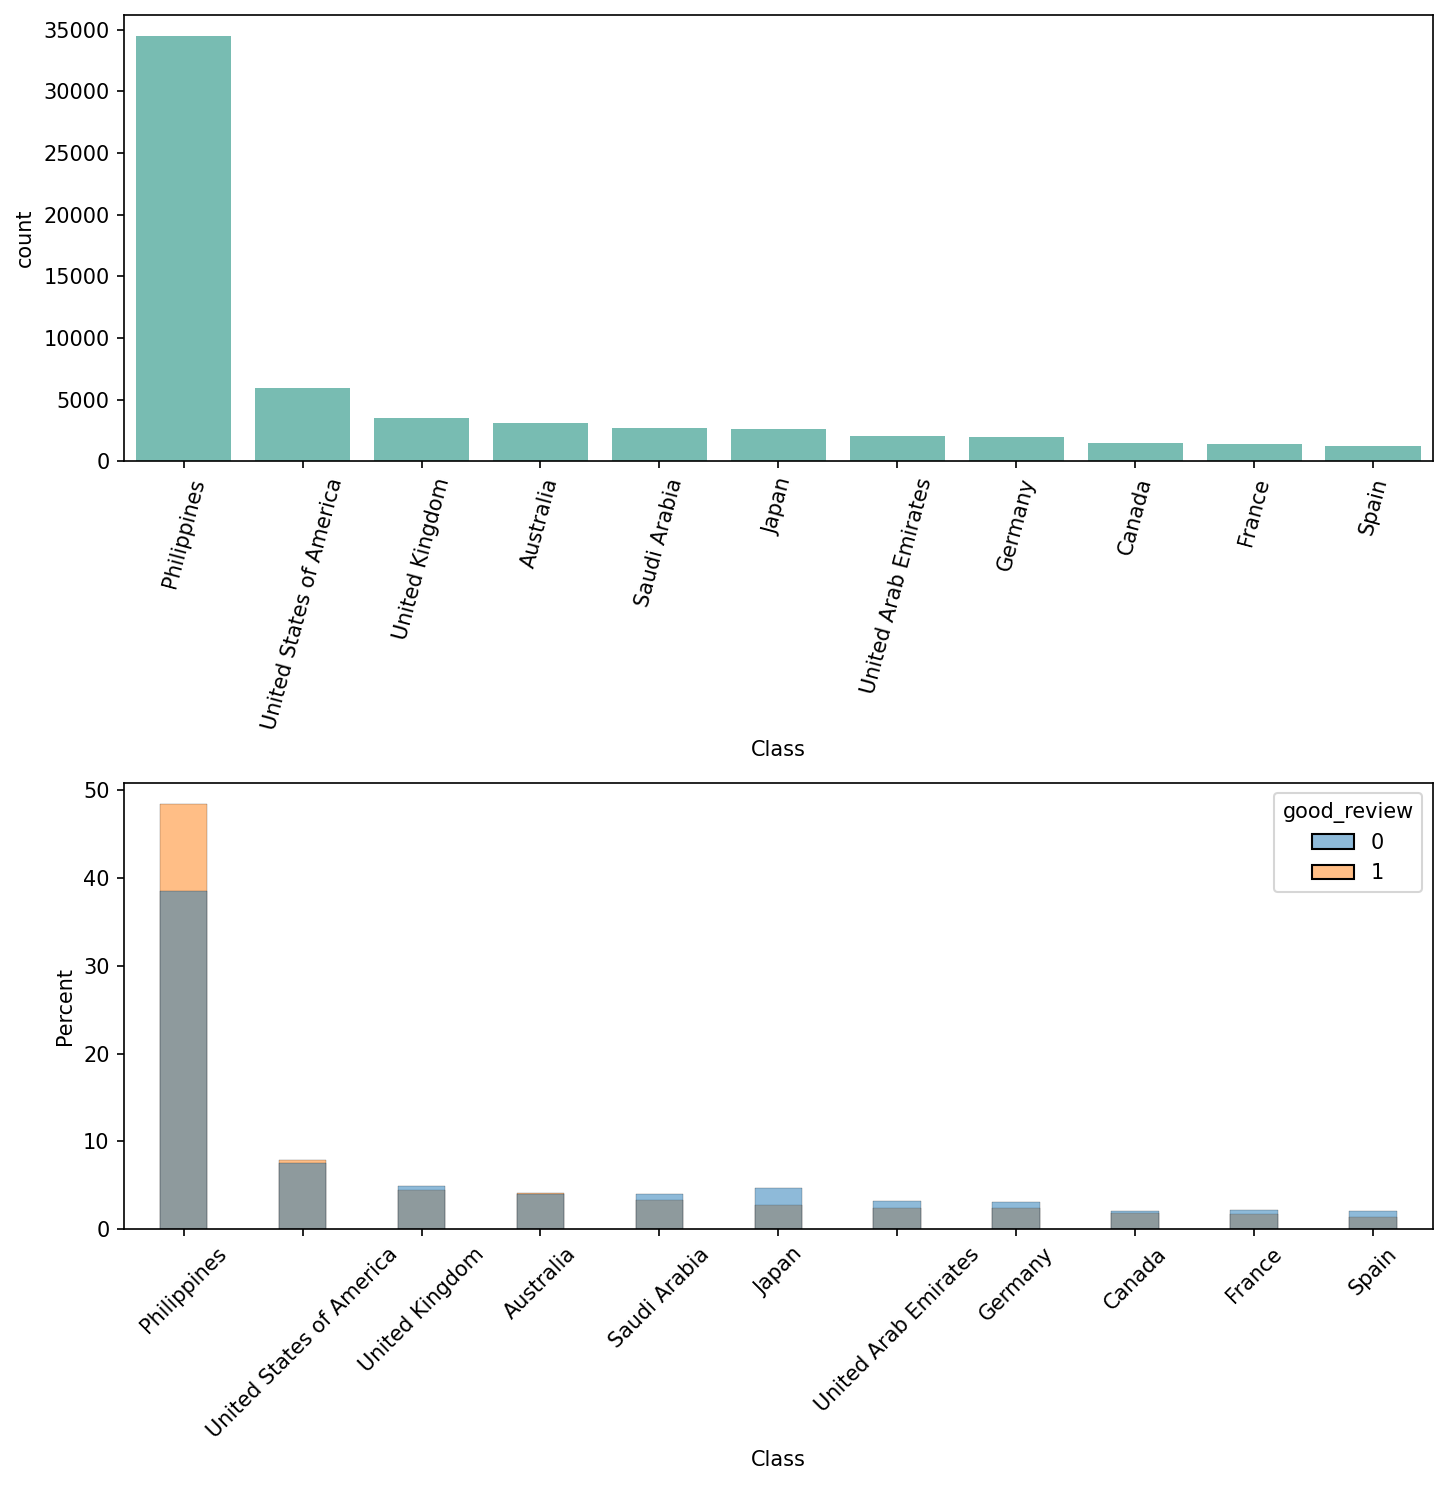

In [16]:



fig= plt.figure(figsize=(9.75,10),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

plot_bar_sp(df_tr,"from_country","title",orient="x",  clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"from_country","title",orient="x",hue="good_review",clr='#6cc8ba',ax=ax2)


# ax1.set_xticks([1]+np.arange(0, 10).tolist())
# ax2.set_xticks([1]+np.arange(0, 10).tolist())
ax1.set_xlim([-0.5, 10.5])
ax2.set_xlim([-0.5, 10.5])

#ax2.sharex(ax1)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()

In [17]:
display((df_tr.from_country.value_counts(normalize=True)*100).head(10))

Philippines                 45.149581
United States of America     7.756215
United Kingdom               4.612582
Australia                    4.051734
Saudi Arabia                 3.528888
Japan                        3.410952
United Arab Emirates         2.664028
Germany                      2.616854
Canada                       1.902690
France                       1.850275
Name: from_country, dtype: float64

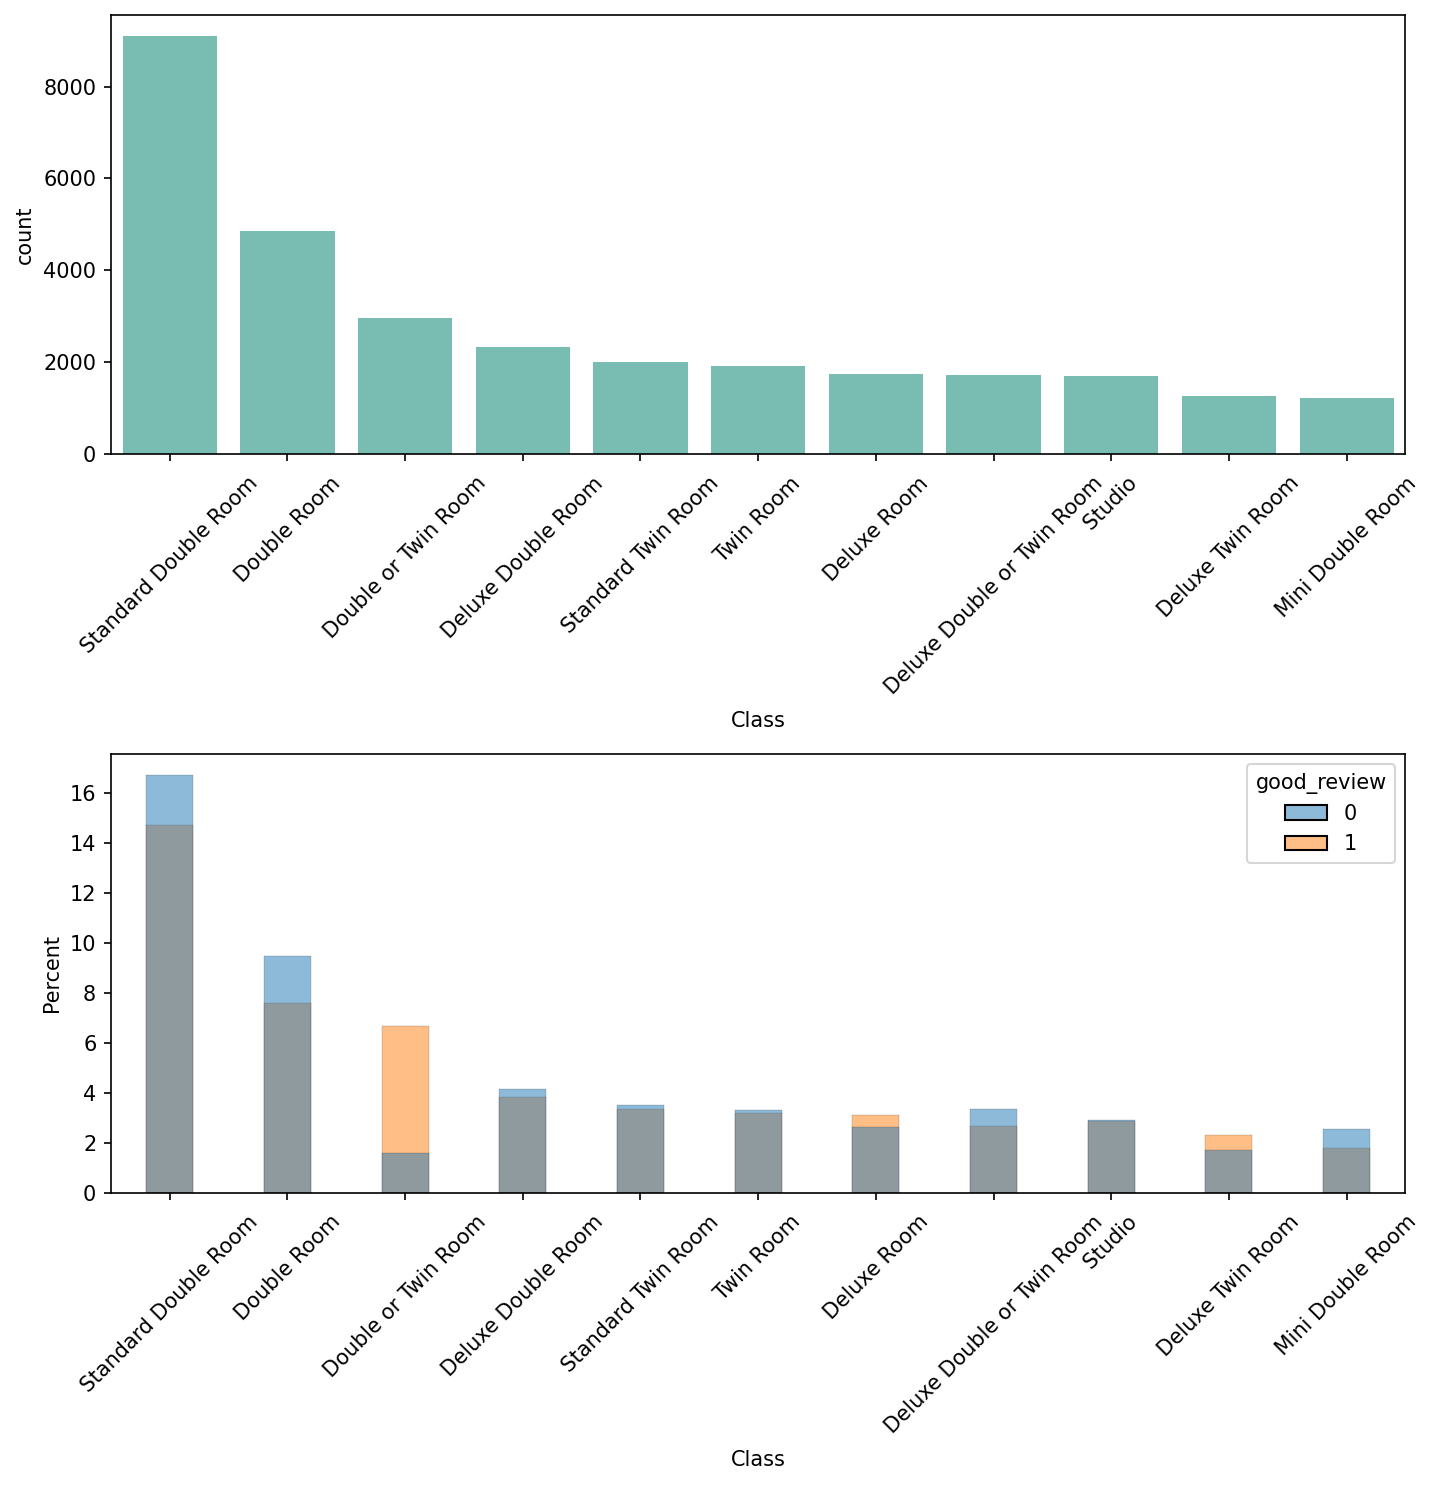

In [18]:



fig= plt.figure(figsize=(9.75,10),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

plot_bar_sp(df_tr,"room_type_y","title",orient="x",  clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"room_type_y","title",orient="x",hue="good_review",clr='#6cc8ba',ax=ax2)


# ax1.set_xticks([1]+np.arange(0, 10).tolist())
# ax2.set_xticks([1]+np.arange(0, 10).tolist())
ax1.set_xlim([-0.5, 10.5])
ax2.set_xlim([-0.5, 10.5])

#ax2.sharex(ax1)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()

In [19]:
display(len(df_tr.room_type_y.dropna()))
display((df_tr.room_type_y.dropna().value_counts(normalize=True)*100).head(10))
print("")

display((df_tr.room_type_y.dropna().value_counts(normalize=True)*100).tail(10))

59145

 Standard Double Room           15.397751
 Double Room                     8.205258
 Double or Twin Room             5.001268
 Deluxe Double Room              3.936089
 Standard Twin Room              3.396737
 Twin Room                       3.231042
 Deluxe Room                     2.948685
 Deluxe Double or Twin Room      2.889509
 Studio                          2.864147
 Deluxe Twin Room                2.111759
Name: room_type_y, dtype: float64

 Premier Suite                                         0.001691
 Premium guest room with balcony and lounge access     0.001691
 Two Bedroom Deluxe                                    0.001691
 Junior Suite, 1 Bedroom Suite, 1 King, City view      0.001691
 Club level, Guest room, 1 King, City view             0.001691
 Premiere Suite                                        0.001691
 Prestige Suite Bay                                    0.001691
 Queen Studio                                          0.001691
 Single Room with Bathroom                             0.001691
 Executive Guest Room with Lounge Access               0.001691
Name: room_type_y, dtype: float64

### Timeseries

In [20]:
df_tr

,name,occupant_type,from_country,room_type_y,nights_stayed_,date_stayed,month,year,month_name,date_reviewed_,month_reviewed,year_reviewed,review_score,good_review
0,Aira,Couple,Philippines,NaN,1,2022-01-01,1,2022,January,2022-01-01,1,2022,10.0,1
1,Nicanor,Family,Philippines,Triple Room,2,2022-11-01,11,2022,November,2022-11-01,11,2022,7.0,0
2,Henry,Couple,Philippines,NaN,1,2022-06-01,6,2022,June,2022-06-01,6,2022,5.0,0
3,Vinu,Solo traveler,India,Deluxe Room,6,2022-05-01,5,2022,May,2022-05-01,5,2022,6.0,0
4,Salt,Family,United Arab Emirates,Triple Room,1,2022-05-01,5,2022,May,2022-05-01,5,2022,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76531,Kern,Solo traveler,Philippines,NaN,1,2022-03-01,3,2022,March,2022-03-01,3,2022,10.0,1
76532,Jun,Couple,Philippines,NaN,1,2022-03-01,3,2022,March,2022-03-01,3,2022,10.0,1
76533,Kanji,Solo traveler,Philippines,NaN,2,2019-12-01,12,2019,December,2019-12-01,12,2019,5.0,0
76534,Antonino,Family,United Kingdom,NaN,2,2019-12-01,12,2019,December,2019-12-01,12,2019,2.9,0


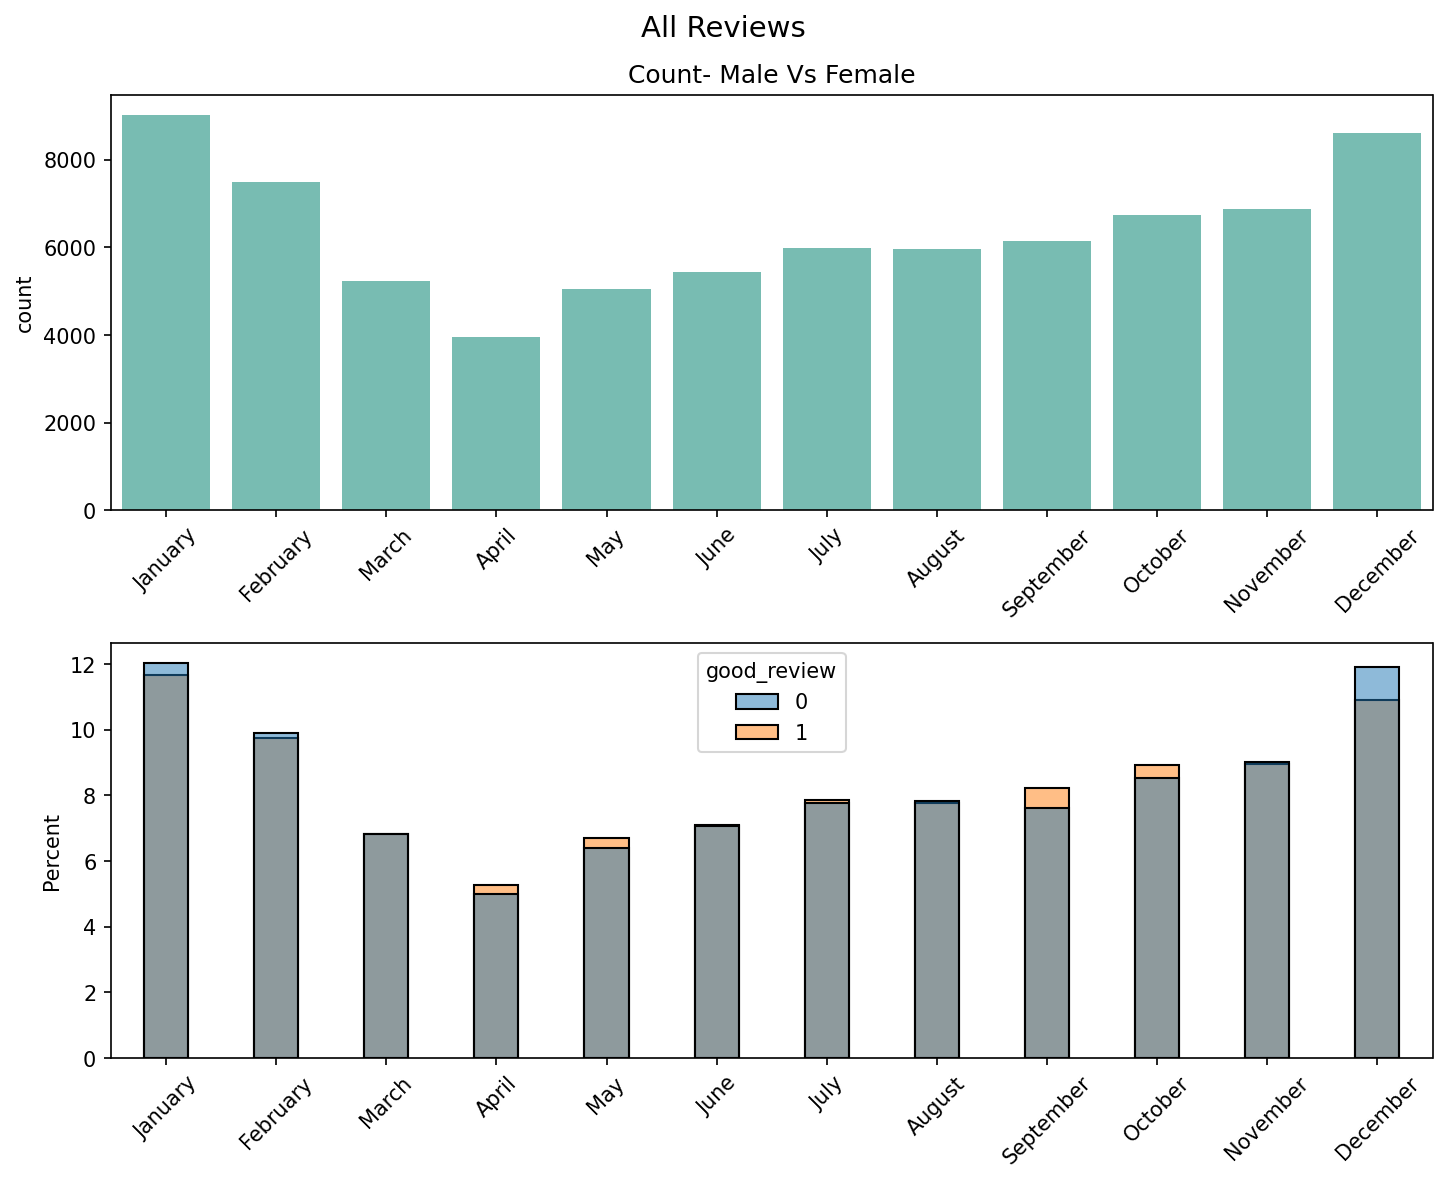

In [21]:


fig= plt.figure(figsize=(9.75,8),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df_tr,"month_name","title",orient="x", time_series=True,month_data=True, clr='#6cc8ba',ax=ax1,long_dates=True)
plot_bar_sp(df_tr,"month_name","title",orient="x",hue="good_review", time_series=True,month_data=True, clr='#6cc8ba',ax=ax2,long_dates=True)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

ax1.set_title("Count- Male Vs Female")
ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
fig.suptitle("All Reviews", fontsize=14)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)

fig.tight_layout()


In [22]:
df_tr.month.value_counts(normalize=True)*100

1     11.797063
12    11.244382
2      9.800617
11     8.984008
10     8.802394
9      8.032821
7      7.830302
8      7.791105
6      7.097314
3      6.832079
5      6.611268
4      5.176649
Name: month, dtype: float64

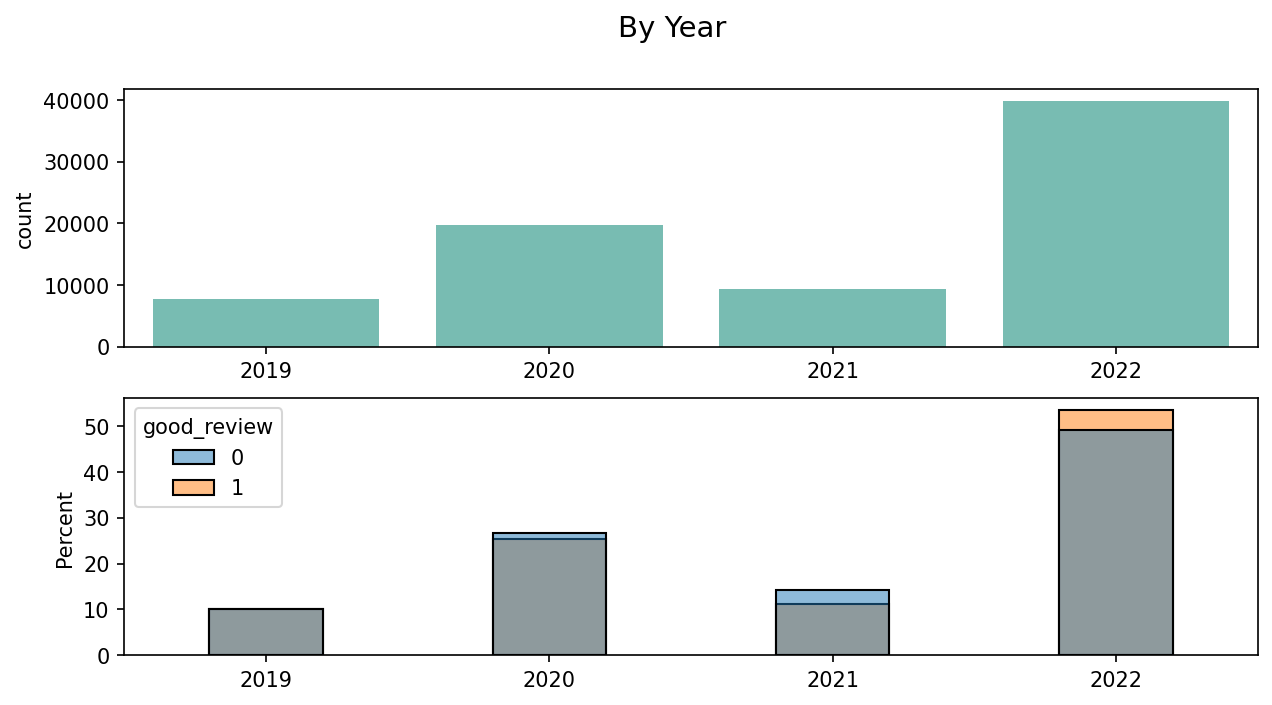

In [23]:


fig= plt.figure(figsize=(9.75,5),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df_tr,"year","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"year","title",orient="x", hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

#ax1.set_title("Count- Male Vs Female")
#ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")

fig.suptitle("By Year", fontsize=14)

ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)